In [204]:
# required modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
df_rest = pd.read_csv('../raw_data/raw_data_combined_v1.06.csv').drop(columns='original_index')
df_rest.head()

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,rating,user_ratings_total,...,population_age_0_14,population_15_19,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person
0,ChIJd6kh67ZkjEcRC1IQourQOyo,7159041.0,4de685281f6e9d90c7f5325c,Restaurant La Tentation,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",2.0,2.0,4.2,158.0,...,4967,1547,1937,5163,5549,4924,4290,5625,16282,109266
1,ChIJX68uubZkjEcRKKxpZ7OrgqU,13322506.0,NaN,Café Restaurant Palma,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,3.7,141.0,...,4967,1547,1937,5163,5549,4924,4290,5625,16282,109266
2,ChIJPcYsG_BljEcR4kTFqBJJoK4,6720272.0,NaN,Le Versailles,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,2.0,3.9,56.0,...,4967,1547,1937,5163,5549,4924,4290,5625,16282,109266
3,ChIJhb4e-Ep7jEcRY38kziIGZmE,NaN,NaN,Restaurant Divan,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",2.0,NaN,4.5,113.0,...,6055,1956,2148,4721,5127,5017,3956,5342,7187,123472
4,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,4967,1547,1937,5163,5549,4924,4290,5625,16282,109266


In [25]:
df_rest.columns

Index(['place_id', 'tripadvisor_id', 'fsq_id', 'name', 'business_status',
       'types', 'price_level', 'ta_price_level', 'rating',
       'user_ratings_total', 'ta_rating', 'ta_user_ratings_total',
       ' combined_rating ', 'geometry.location.lat', 'geometry.location.lng',
       'formatted_address', 'zip_code', 'city', 'international_phone_number',
       'website', 'google_category', 'ta_4sq_cuisine1', 'ta_4sq_cuisine2',
       'ta_4sq_cuisine3', 'ta_4sq_cuisine4', 'ta_4sq_cuisine5',
       'main_category_1', 'main_category_2', 'main_category_3',
       'main_category_4', 'combined_main_category', 'sub_category',
       ' neighboorhood_area_km2 ', '  resident_population_total ',
       ' population_age_0_14 ', ' population_15_19 ', ' population_20_24 ',
       ' population_25_34 ', ' population_35_44 ', ' population_45_54 ',
       ' population_54_64 ', ' population_65+ ', ' resident_per_km2 ',
       ' brut_income_annual_per_person '],
      dtype='object')

In [26]:
rest_grid_points = df_rest[['geometry.location.lat', 'geometry.location.lng']].to_numpy()
rest_grid_points

array([[46.205232 ,  6.1149446],
       [46.2049308,  6.1140212],
       [46.2057517,  6.1147635],
       ...,
       [46.1997726,  6.174561 ],
       [46.1996953,  6.175007 ],
       [46.2016903,  6.1746138]])

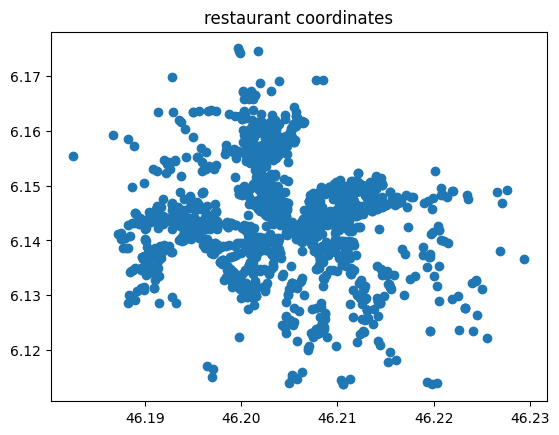

In [156]:
lat, lng = rest_grid_points[:,0], rest_grid_points[:,1]
plt.title('restaurant coordinates')
plt.scatter(lat, lng);

In [193]:
# let's start with a baseline of 4 arbitrary, just by looking at the graph
X = rest_grid_points
random_state = 42 #important to have reproducable kmeans algorithm

# Instanciate the model
km_base = KMeans(n_clusters=4, random_state=random_state)

# fit kmeans on grid_points
km_base.fit(X)

# make a prediction
y_pred_base = pd.Series(km_base.labels_)
y_pred_base

0       2
1       2
2       2
3       2
4       2
       ..
1608    0
1609    0
1610    0
1611    0
1612    0
Length: 1613, dtype: int32

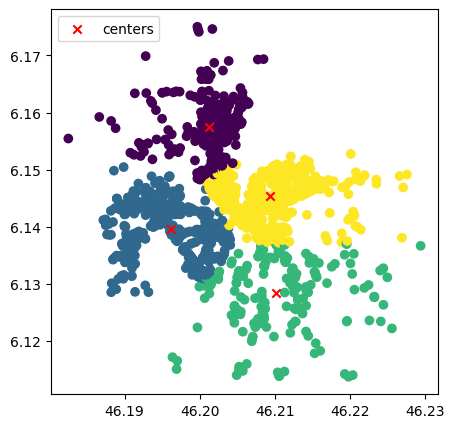

In [195]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=y_pred_base)
plt.scatter(km_base.cluster_centers_[:,0], km_base.cluster_centers_[:,1], c='r', marker='x', label='centers')
plt.legend(loc='upper left')
plt.show()

# Find the optimal number of clusters

## Inertia Analysis

In [194]:
# Let's find the best K
# have a look at zip codes, this can be the arbitrary maximum number of clusters if we do not use any machine learning
df_rest['zip_code'].nunique()

16

In [122]:
wcss = [] #within-cluster sum of square
clusters = list(range(1, 17))
for cluster in clusters:
    intertia = KMeans(n_clusters=cluster, random_state=random_state).fit(X).inertia_
    wcss.append(intertia)

In [123]:
df_wcss = pd.DataFrame({'wcss':wcss}, index=clusters)
df_wcss

,wcss
1,0.242895
2,0.152367
3,0.102784
4,0.064896
5,0.053450
6,0.043930
7,0.038192
8,0.033671
9,0.029794
10,0.027610


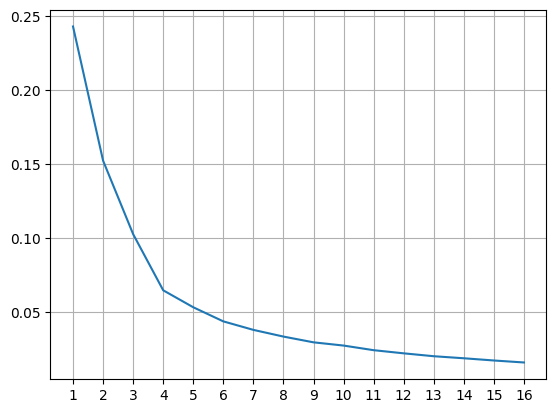

In [124]:
plt.plot(df_wcss.index, wcss)
plt.xticks(df_wcss.index)
plt.grid(True)

If we compress our restaurants into 1 clusters...
The Kmeans inertia is equal to 0.243
------------------------------------------------------------------------------------------------------------------------


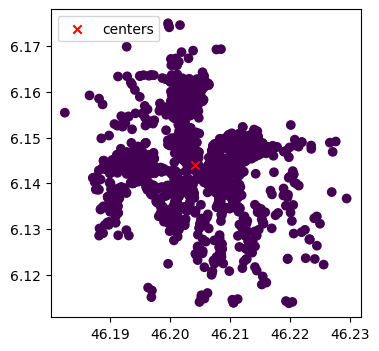

If we compress our restaurants into 2 clusters...
The Kmeans inertia is equal to 0.152
------------------------------------------------------------------------------------------------------------------------


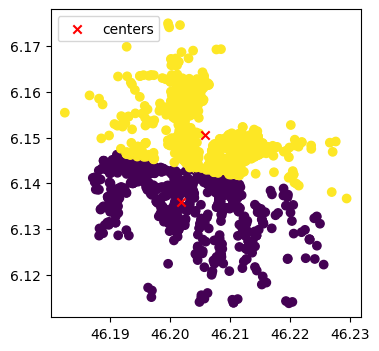

If we compress our restaurants into 3 clusters...
The Kmeans inertia is equal to 0.103
------------------------------------------------------------------------------------------------------------------------


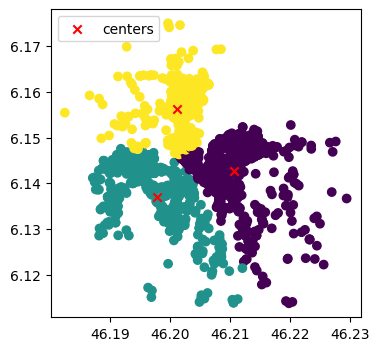

If we compress our restaurants into 4 clusters...
The Kmeans inertia is equal to 0.065
------------------------------------------------------------------------------------------------------------------------


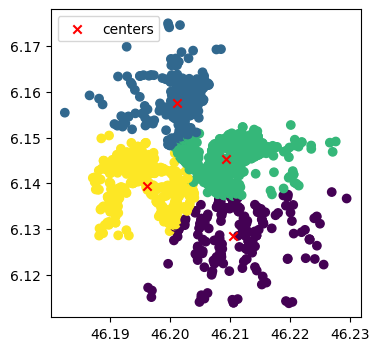

If we compress our restaurants into 5 clusters...
The Kmeans inertia is equal to 0.053
------------------------------------------------------------------------------------------------------------------------


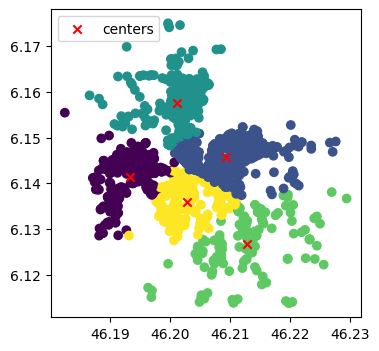

If we compress our restaurants into 6 clusters...
The Kmeans inertia is equal to 0.044
------------------------------------------------------------------------------------------------------------------------


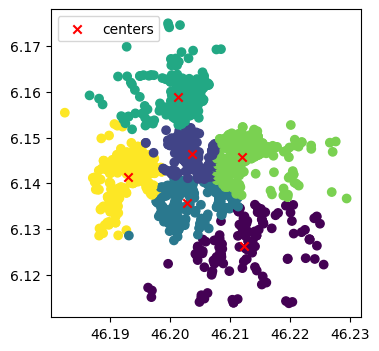

If we compress our restaurants into 7 clusters...
The Kmeans inertia is equal to 0.038
------------------------------------------------------------------------------------------------------------------------


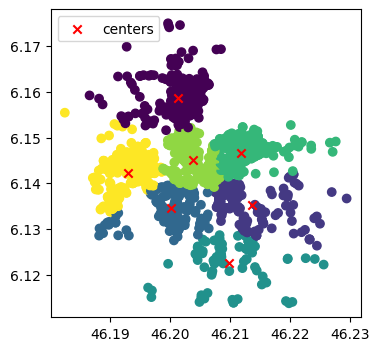

If we compress our restaurants into 8 clusters...
The Kmeans inertia is equal to 0.034
------------------------------------------------------------------------------------------------------------------------


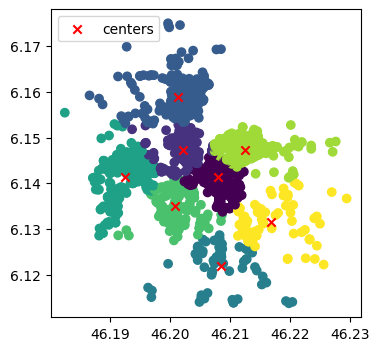

If we compress our restaurants into 9 clusters...
The Kmeans inertia is equal to 0.030
------------------------------------------------------------------------------------------------------------------------


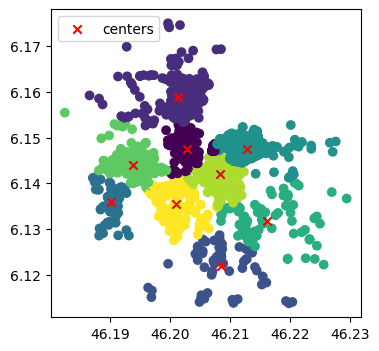

If we compress our restaurants into 10 clusters...
The Kmeans inertia is equal to 0.027
------------------------------------------------------------------------------------------------------------------------


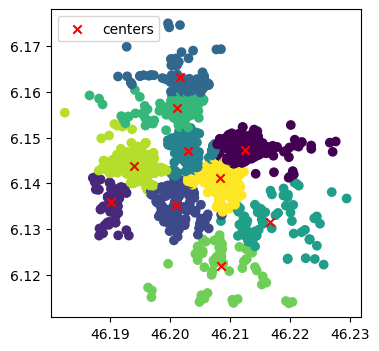

If we compress our restaurants into 11 clusters...
The Kmeans inertia is equal to 0.025
------------------------------------------------------------------------------------------------------------------------


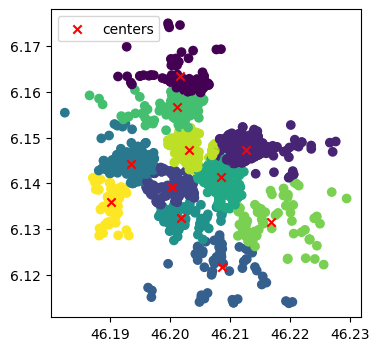

If we compress our restaurants into 12 clusters...
The Kmeans inertia is equal to 0.022
------------------------------------------------------------------------------------------------------------------------


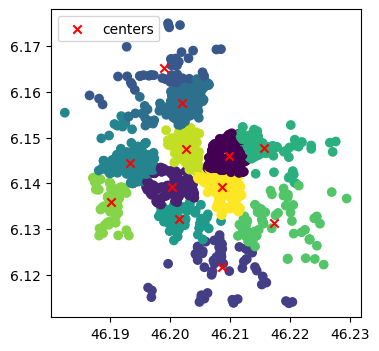

If we compress our restaurants into 13 clusters...
The Kmeans inertia is equal to 0.020
------------------------------------------------------------------------------------------------------------------------


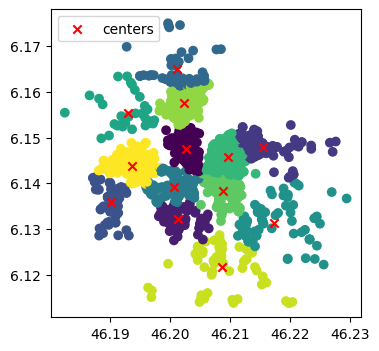

If we compress our restaurants into 14 clusters...
The Kmeans inertia is equal to 0.019
------------------------------------------------------------------------------------------------------------------------


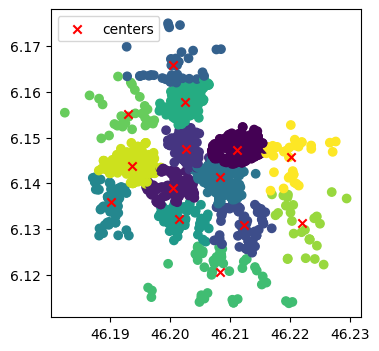

If we compress our restaurants into 15 clusters...
The Kmeans inertia is equal to 0.018
------------------------------------------------------------------------------------------------------------------------


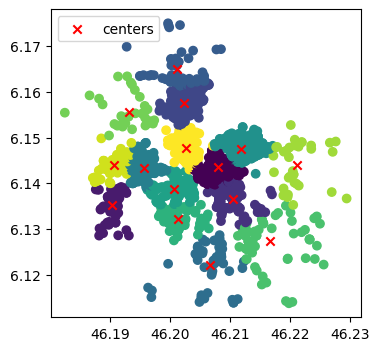

If we compress our restaurants into 16 clusters...
The Kmeans inertia is equal to 0.016
------------------------------------------------------------------------------------------------------------------------


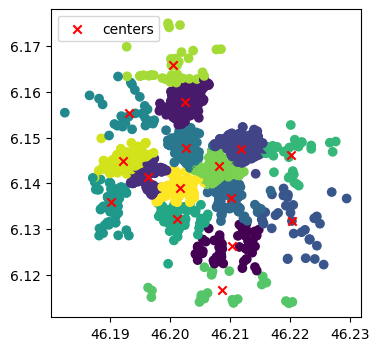

In [208]:
# let's continue to illustrate different clusters
X = rest_grid_points

wcss = []
clusters = list(range(1, 17))

for cluster in clusters:
    kmeans = KMeans(n_clusters =cluster, max_iter=100)
    kmeans.fit(X)
    
    # compute inertia
    wcss.append(kmeans.inertia_)
    
    # predict labels
    y_pred = kmeans.labels_
    
    # illustrate restaurant clusters
    print(f"If we compress our restaurants into {cluster} clusters...")
    print(f"The Kmeans inertia is equal to {kmeans.inertia_:.3f}")
    print("-"*120)
    plt.figure(figsize=(4,4))
    plt.scatter(X[:,0],X[:,1], c=y_pred)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r', marker='x', label='centers')
    plt.legend(loc='upper left')
    plt.show()

## Silhouette Analysis

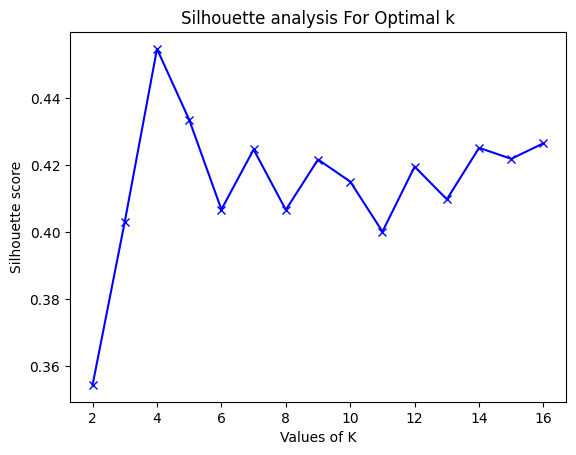

In [220]:
# let's continue to illustrate different clusters
X = rest_grid_points
silhouette_avg = []
clusters = list(range(2, 17))

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=100)
    kmeans.fit(X)
    
    # predict labels
    y_pred = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, y_pred))

plt.plot(clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

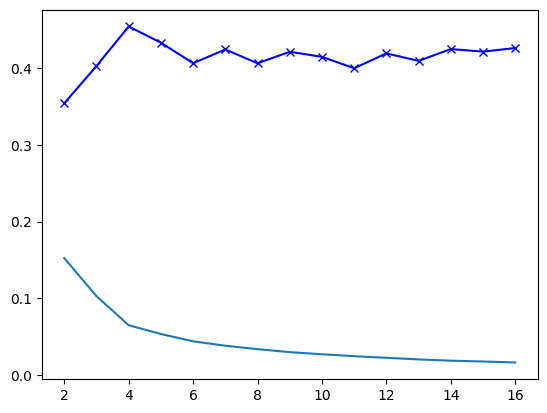

In [231]:
plt.plot(df_wcss.iloc[1:].index, wcss[1:])
plt.plot(clusters,silhouette_avg,'bx-')

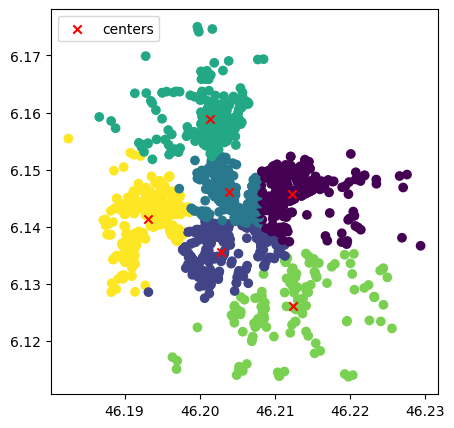

In [232]:
# Using 6 clusters

# let's start with a baseline of 4 arbitrary, just by looking at the graph
X = rest_grid_points
random_state = 42 #important to have reproducable kmeans algorithm

# Instanciate the model
km_final = KMeans(n_clusters=6, random_state=random_state)

# fit kmeans on grid_points
km_final.fit(X)

# make a prediction
y_pred_final = pd.Series(km_final.labels_)
y_pred_final

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=y_pred_final)
plt.scatter(km_final.cluster_centers_[:,0], km_final.cluster_centers_[:,1], c='r', marker='x', label='centers')
plt.legend(loc='upper left')
plt.show()

In [236]:
df_rest['cluster'] = y_pred_final
df_rest.head()

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,rating,user_ratings_total,...,population_15_19,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,cluster
0,ChIJd6kh67ZkjEcRC1IQourQOyo,7159041.0,4de685281f6e9d90c7f5325c,Restaurant La Tentation,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",2.0,2.0,4.2,158.0,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,4
1,ChIJX68uubZkjEcRKKxpZ7OrgqU,13322506.0,NaN,Café Restaurant Palma,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,3.7,141.0,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,4
2,ChIJPcYsG_BljEcR4kTFqBJJoK4,6720272.0,NaN,Le Versailles,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,2.0,3.9,56.0,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,4
3,ChIJhb4e-Ep7jEcRY38kziIGZmE,NaN,NaN,Restaurant Divan,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",2.0,NaN,4.5,113.0,...,1956,2148,4721,5127,5017,3956,5342,7187,123472,4
4,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1547,1937,5163,5549,4924,4290,5625,16282,109266,4


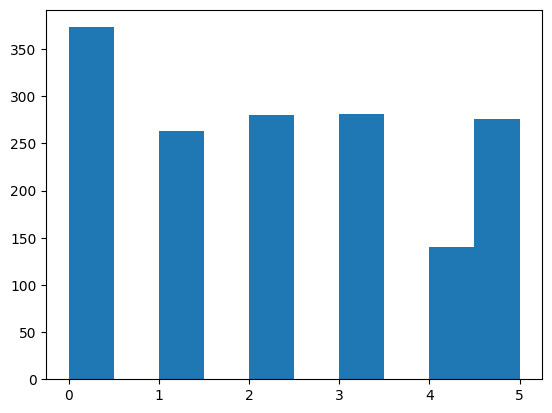

In [257]:
plt.hist(df_rest['cluster']);

In [259]:
km_final.labels_

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [260]:
y_pred_final

0       4
1       4
2       4
3       4
4       4
       ..
1608    3
1609    3
1610    3
1611    3
1612    3
Length: 1613, dtype: int32

In [268]:
np.where(y_pred_final==0)[0]

array([ 348,  349,  350,  351,  398,  399,  400,  401,  445,  446,  447,
        448,  449,  450,  451,  452,  453,  489,  490,  491,  492,  493,
        494,  495,  496,  497,  498,  499,  500,  501,  502,  503,  560,
        561,  582,  584,  585,  586,  587,  588,  589,  590,  591,  592,
        635,  638,  639,  640,  641,  642,  643,  644,  645,  646,  647,
        648,  649,  650,  725,  726,  727,  728,  729,  730,  731,  732,
        733,  734,  735,  736,  737,  738,  739,  740,  741,  742,  743,
        744,  799,  800,  801,  803,  804,  805,  806,  807,  808,  809,
        810,  811,  812,  813,  814,  815,  816,  817,  818,  854,  855,
        856,  857,  858,  859,  860,  861,  862,  863,  864,  865,  866,
        867,  868,  869,  870,  871,  872,  873,  874,  875,  876,  877,
        878,  879,  880,  881,  882,  883,  884,  885,  886,  887,  888,
        889,  890,  891,  892,  893,  894,  895,  896,  897,  946,  947,
        948,  950,  951,  952,  953,  954,  955,  9

In [272]:
km_final.cluster_centers_[y_pred_final]

array([[46.21240722,  6.126208  ],
       [46.21240722,  6.126208  ],
       [46.21240722,  6.126208  ],
       ...,
       [46.20131719,  6.15880569],
       [46.20131719,  6.15880569],
       [46.20131719,  6.15880569]])

In [276]:
# squared distance to cluster center
X_dist = km_final.transform(X)**2
X_dist

array([[0.00100219, 0.0004345 , 0.00097027, 0.00193912, 0.00017835,
        0.00084479],
       [0.00106437, 0.0004723 , 0.00102789, 0.00201871, 0.00020441,
        0.00088718],
       [0.0010064 , 0.00044472, 0.00098323, 0.00195938, 0.00017527,
        0.00086728],
       ...,
       [0.0009814 , 0.00152317, 0.00082909, 0.00025062, 0.00249765,
        0.00114774],
       [0.00100917, 0.00155856, 0.00085535, 0.00026511, 0.00254294,
        0.00117654],
       [0.00094033, 0.00151894, 0.00081991, 0.00025004, 0.00245797,
        0.00118058]])

In [278]:
tmp = pd.DataFrame(X_dist.sum(axis=1).round(2), columns=['sqdist'])
tmp['label'] = y_pred_final
tmp

,sqdist,label
0,0.01,4
1,0.01,4
2,0.01,4
3,0.01,4
4,0.01,4
...,...,...
1608,0.01,3
1609,0.01,3
1610,0.01,3
1611,0.01,3


In [279]:
center_dists = np.array([X_dist[i][x] for i,x in enumerate(y_pred_final)])

In [282]:
max_indices = []
for label in np.unique(km_final.labels_):
    X_label_indices = np.where(y_pred_final==label)[0]
    max_label_idx = X_label_indices[np.argmax(center_dists[y_pred_final==label])]
    max_indices.append(max_label_idx)

In [284]:
max_indices

[351, 104, 1301, 1611, 3, 1378]

In [290]:
df_rest.iloc[351]

place_id                                                 ChIJrcqVYPpkjEcRdQXb7R4jqIo
tripadvisor_id                                                            12909029.0
fsq_id                                                                           NaN
name                                                               La Vie des Champs
business_status                                                          OPERATIONAL
types                              ['restaurant', 'park', 'food', 'point_of_inter...
price_level                                                                      2.0
ta_price_level                                                                   2.0
rating                                                                           4.7
user_ratings_total                                                             168.0
ta_rating                                                                        4.0
ta_user_ratings_total                                            

In [288]:
rest_grid_points[351]

array([46.2294255,  6.1366652])

In [297]:
km_final.cluster_centers_[0]

46.21223289276139

In [310]:
import geopy.distance

c0 = [46.21223289, 6.14581825]
c1 = [46.229425, 6.136665]

rad = geopy.distance.geodesic(c0, c1).km
rad

2.037316856327975

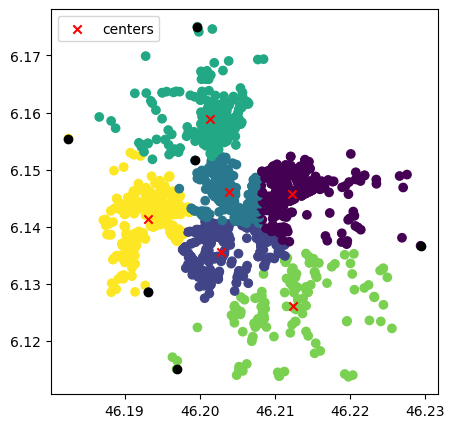

In [314]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=y_pred_final)
plt.scatter(km_final.cluster_centers_[:,0], km_final.cluster_centers_[:,1], c='r', marker='x', label='centers')
plt.scatter(rest_grid_points[max_indices][:,0],rest_grid_points[max_indices][:,1],c='black')
plt.legend(loc='upper left')
plt.show()